In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Administrator\Downloads\loan_approved.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.drop('Loan_ID',axis = 1,inplace = True)

In [5]:
df.shape

(614, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  601 non-null    object 
 1   Married                 611 non-null    object 
 2   Dependents              599 non-null    object 
 3   Education               614 non-null    object 
 4   Self_Employed           582 non-null    object 
 5   ApplicantIncome         614 non-null    int64  
 6   CoapplicantIncome       614 non-null    float64
 7   LoanAmount              592 non-null    float64
 8   Loan_Amount_Term        600 non-null    float64
 9   Credit_History          564 non-null    float64
 10  Property_Area           614 non-null    object 
 11  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
(df == 0).sum() # Zeros are valid

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome         273
LoanAmount                  0
Loan_Amount_Term            0
Credit_History             89
Property_Area               0
Loan_Status (Approved)      0
dtype: int64

In [9]:
df.isnull().sum()[df.isnull().sum() > 0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [10]:
df.isnull().sum()/len(df) * 100

Gender                    2.117264
Married                   0.488599
Dependents                2.442997
Education                 0.000000
Self_Employed             5.211726
ApplicantIncome           0.000000
CoapplicantIncome         0.000000
LoanAmount                3.583062
Loan_Amount_Term          2.280130
Credit_History            8.143322
Property_Area             0.000000
Loan_Status (Approved)    0.000000
dtype: float64

In [11]:
df.select_dtypes("object")

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


#changing DataTYpe

In [12]:
df['Dependents'] = df['Dependents'].replace('3+','3')

In [13]:
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')


In [14]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15040\4239936602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)


In [15]:
df['Dependents'].unique()

array([0., 1., 2., 3.])

In [16]:
df['Dependents'] = df['Dependents'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  601 non-null    object 
 1   Married                 611 non-null    object 
 2   Dependents              614 non-null    int64  
 3   Education               614 non-null    object 
 4   Self_Employed           582 non-null    object 
 5   ApplicantIncome         614 non-null    int64  
 6   CoapplicantIncome       614 non-null    float64
 7   LoanAmount              592 non-null    float64
 8   Loan_Amount_Term        600 non-null    float64
 9   Credit_History          564 non-null    float64
 10  Property_Area           614 non-null    object 
 11  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


In [18]:
df.isnull().sum()[df.isnull().sum() > 0]

Gender              13
Married              3
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

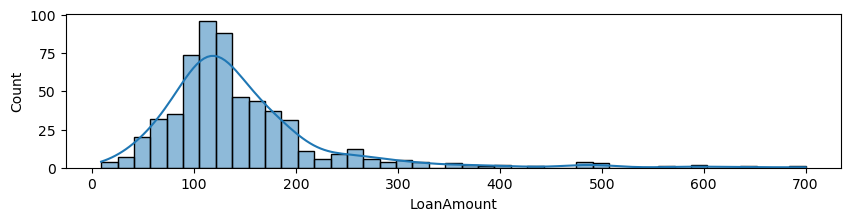

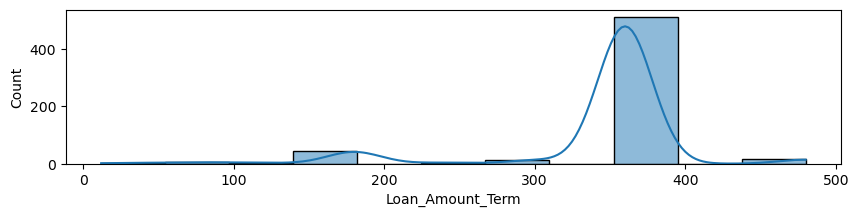

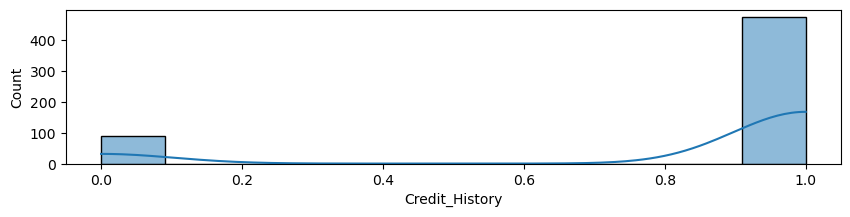

In [19]:
median_cols = ['LoanAmount','Loan_Amount_Term','Credit_History']
for col in median_cols:
    plt.figure(figsize = (10,2))

    sns.histplot(df[col],kde =True)
    

In [20]:
mode_cols = ['Gender','Married','Self_Employed']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [21]:
median_cols = ['LoanAmount','Loan_Amount_Term','Credit_History']
for col in median_cols:
    df[col] =df[col].fillna(df[col].median())

In [22]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

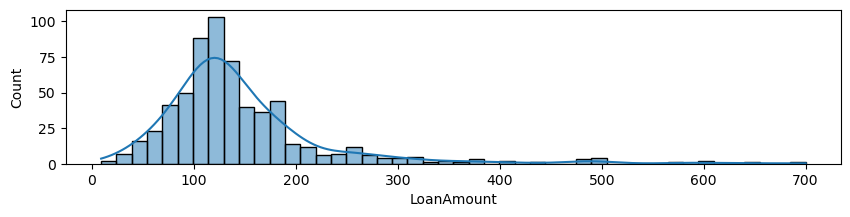

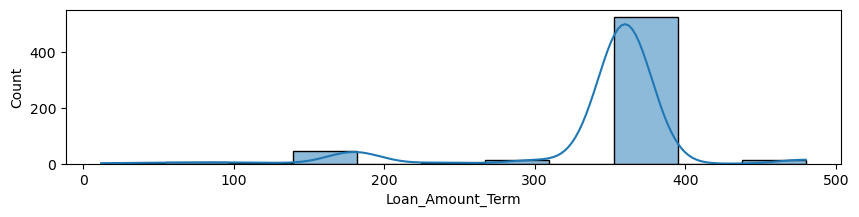

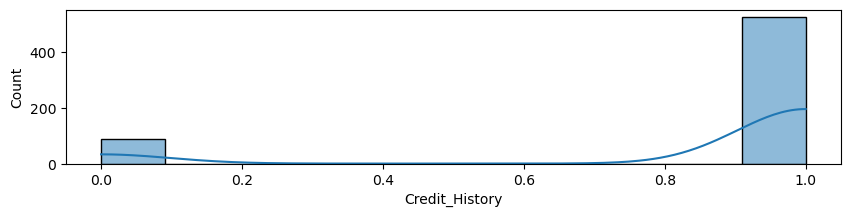

In [23]:
for col in median_cols:
    plt.figure(figsize = (10,2))

    sns.histplot(df[col],kde =True)
    

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
num_cols = df.select_dtypes("number")

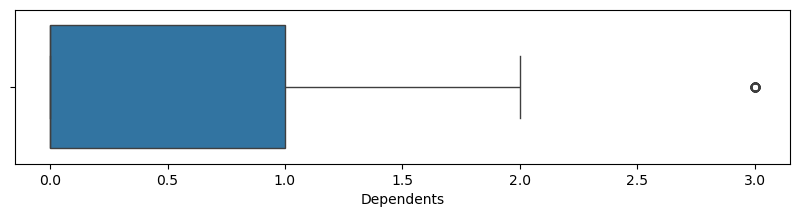

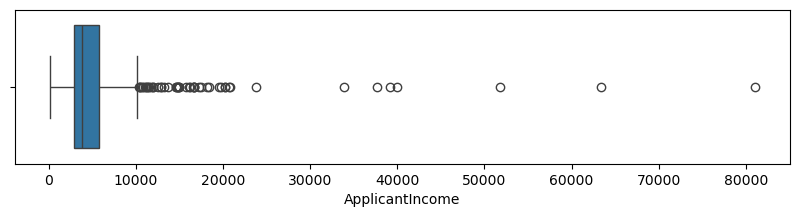

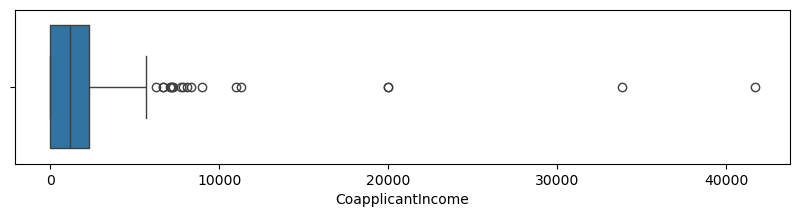

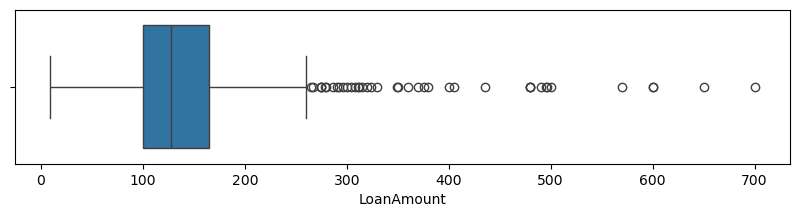

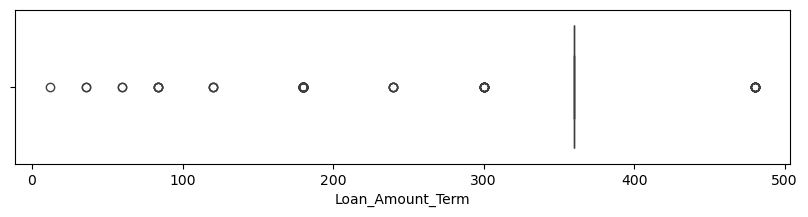

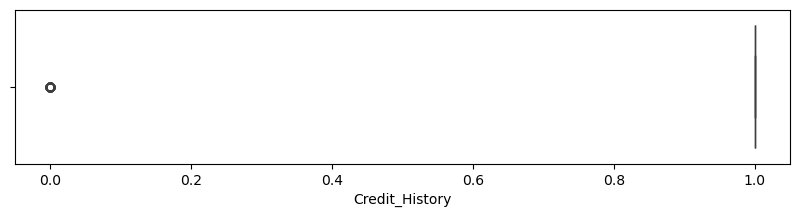

In [26]:
for col in num_cols:
    plt.figure(figsize = (10,2))

    sns.boxplot(x = df[col])

In [27]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)       # 25th percentile
    Q3 = df[col].quantile(0.75)       # 75th percentile
    IQR = Q3 - Q1                      # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR       # minimum allowed
    upper_bound = Q3 + 1.5 * IQR       # maximum allowed
    
    # Apply capping
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


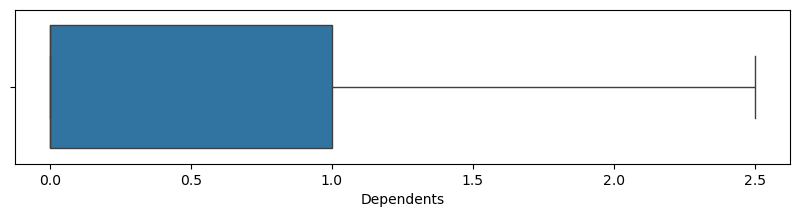

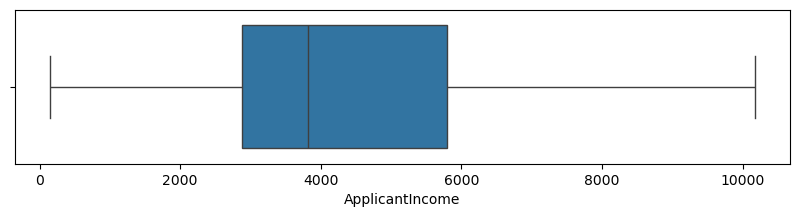

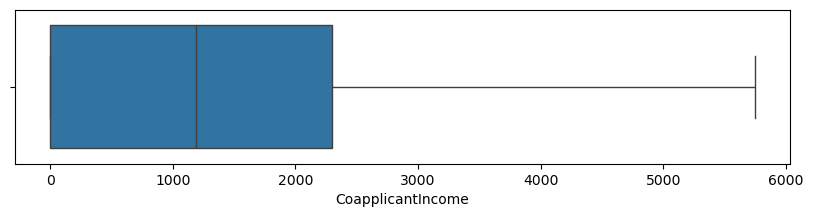

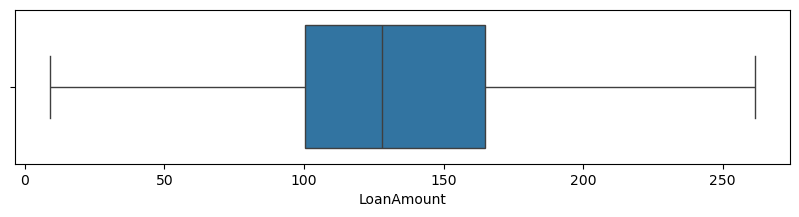

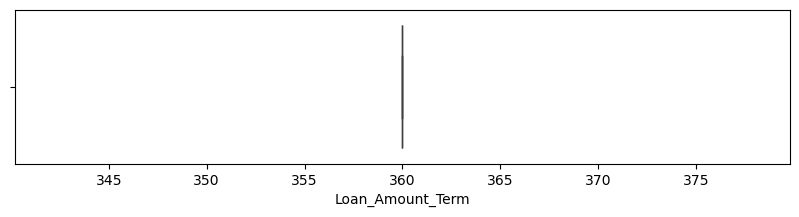

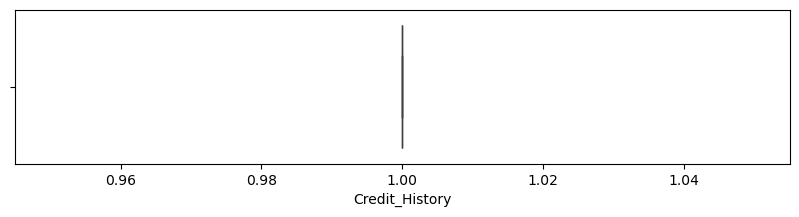

In [28]:
for col in num_cols:
    plt.figure(figsize = (10,2))

    sns.boxplot(x = df[col])

In [29]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [30]:
df.rename(columns = {'Loan_Status (Approved)':'Loan_status'},inplace = True)

In [31]:
y = df['Loan_status']

In [32]:
x = df.drop('Loan_status',axis = 1)

In [33]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [34]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban


In [35]:
x_cat = x.select_dtypes('object').columns.tolist()
x_num = x.select_dtypes(include =['int64','float64']).columns.tolist()

In [36]:
x_cat

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [37]:
x_num

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [38]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [39]:
x_cat

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [40]:
b_cols = ['Gender','Married','Education','Self_Employed']
le = LabelEncoder()
for col in b_cols:
    x[col] = le.fit_transform(x[col])

In [41]:
nominal_cols = ['Property_Area']

In [42]:
# x_col = pd.get_dummies(x,columns = ['Property_Area'],drop_first = True)

In [43]:
# from sklearn.preprocessing import StandardScaler

# s_s = StandardScaler()
# x[x_num] = s_s.fit_transform(x[x_num])


In [44]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer( transformers = [("num",StandardScaler(),x_num),("cat",OneHotEncoder(drop ='first'),x_cat)])

In [45]:
x_transformed = preprocessing.fit_transform(x)

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

#pipeline methods

In [47]:
pipe_knn = Pipeline(steps = [ ('preprocessing',preprocessing),
                             ('model',KNeighborsClassifier(n_neighbors=5))
                            ])

In [48]:
pipe_dt = Pipeline(steps = [('preprocessing',preprocessing),
                            ('model',DecisionTreeClassifier(random_state = 42))
                           ])

In [74]:
preprocessor_nb = ColumnTransformer([
    ('num', MinMaxScaler(), x_num),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), x_cat)
])

In [75]:
pipe_nb = Pipeline([
    ('preprocessor_nb', preprocessor_nb),
    ('model',  GaussianNB())
])


In [76]:
pipe_knn.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Dependents',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('model', KNeighborsClassifier())])

In [77]:
pipe_dt.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Dependents',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [78]:
print(y_train.shape)

(491,)


In [89]:
pipe_nb.fit(x_train,y_train)

Pipeline(steps=[('preprocessor_nb',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Dependents',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('model', GaussianNB())])

In [90]:
pred_knn = pipe_knn.predict(x_test)
pred_dt = pipe_dt.predict(x_test)
pred_nb = pipe_nb.predict(x_test)

In [91]:
acc_knn = accuracy_score(y_test,pred_knn)
acc_dt = accuracy_score(y_test,pred_dt)
acc_nb = accuracy_score(y_test,pred_nb)

In [92]:
print("KNN - ",acc_knn)
print("DT -",acc_dt)
print("NB - ",acc_nb)

KNN -  0.5934959349593496
DT - 0.5040650406504065
NB -  0.6422764227642277


In [93]:
print("cs - knn",classification_report(y_test,pred_knn))

cs - knn               precision    recall  f1-score   support

           N       0.29      0.12      0.17        43
           Y       0.64      0.85      0.73        80

    accuracy                           0.59       123
   macro avg       0.47      0.48      0.45       123
weighted avg       0.52      0.59      0.53       123



In [94]:
print("cs - DT",classification_report(y_test,pred_dt))

cs - DT               precision    recall  f1-score   support

           N       0.28      0.26      0.27        43
           Y       0.61      0.64      0.63        80

    accuracy                           0.50       123
   macro avg       0.44      0.45      0.45       123
weighted avg       0.50      0.50      0.50       123



In [95]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__n_neighbors':[3,4,5,7,9,11,15],
    'model__weights':['uniform','distance'],
    'model__metric':['euclidean','manhattan']
}
grid_knn = GridSearchCV(
    pipe_knn,
    param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)
grid_knn.fit(x_train,y_train)
print("Best parameters:",grid_knn.best_params_)
print("Best Accuracy:",grid_knn.best_score_)

Best parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 15, 'model__weights': 'uniform'}
Best Accuracy: 0.6822716965574108


In [96]:
param_grid_dt = {
    'model__max_depth': [3,5,7,10,None],
    'model__min_samples_split': [2,5,10],
    'model__min_samples_leaf': [1,2,5]
}

grid_dt = GridSearchCV(
    pipe_dt,
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_dt.fit(x_train, y_train)

print("Best Parameters:", grid_dt.best_params_)
print("Best Accuracy:", grid_dt.best_score_)


Best Parameters: {'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Best Accuracy: 0.6720470006184291


In [99]:
import joblib 
joblib.dump(pipe_nb, "model.pkl")

['model.pkl']